In [48]:
import numpy as np
from scipy import linalg
import timeit
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import time
import random
from tqdm import tqdm
import decimal
from scipy.optimize import curve_fit


In [107]:
#define runner function

def runner(function):
   
    time_array = []
    tqdm._instances.clear()
    for n in tqdm(range(1,2001)):
        random.seed(1)
        
        randomlist = []
        for i in range(n):
            n = random.randint(1000,1000000)
            randomlist.append(n)
        averages = []
        for i in range(5):
            start = time.perf_counter() 
            function(randomlist)         
            averages.append(time.perf_counter()  - start)
        average = (sum(averages)-max(averages))/4
        time_array.append(average)  
    return time_array

In [108]:
# define algorithms

In [109]:
def summator(array):
    sum(array)

def productor(array):
    prod = 1
    for el in array:
        prod *= el
        
def constator(array):
        array[-1]*100
    
def timsort(array):
    sorted(array)   #Timsort is implemented in Python by default
    
def polinomial(array):
    
    def naive_power(x,n):
        a = x
        for i in range(n-1):
            a*=x
        return a
    
    summ = 0
    for i in range(len(array)):
        summ += array[i] * naive_power(1.5,(i))
        
def horner(array, x=1.5):
    result = 0
    for i in range(len(array)-1, -1, -1):
        result = array[i] + (x * result)

def quicksort(array):
    inPlaceQuickSort(array, 0, len(array)-1)
    
def inPlaceQuickSort(A,start,end):
    if start<end:
        pivot=random.randint(start,end)
        temp=A[end]
        A[end]=A[pivot]
        A[pivot]=temp
        
        p=inPlacePartition(A,start,end)
        inPlaceQuickSort(A,start,p-1)
        inPlaceQuickSort(A,p+1,end)


def inPlacePartition(A,start,end):
    pivot=random.randint(start,end)
    temp=A[end]
    A[end]=A[pivot]
    A[pivot]=temp
    newPivotIndex=start-1
    for index in range(start,end):
        if A[index]<A[end]:#check if current val is less than pivot value
            newPivotIndex=newPivotIndex+1
            temp=A[newPivotIndex]
            A[newPivotIndex]=A[index]
            A[index]=temp
    temp=A[newPivotIndex+1]
    A[newPivotIndex+1]=A[end]
    A[end]=temp
    return newPivotIndex+1
    
def bubble_sort(array): 
    n = len(array) 
  
    for i in range(n-1):  
        for j in range(0, n-i-1): 
            if array[j] > array[j+1] : 
                array[j], array[j+1] = array[j+1], array[j] 
                
def matrix(array):
    n = len(array) #This is here just to uniform the runner function. 
                   #I don't need the array here, of coure, just 'n'.
    A = np.random.randint(5, size=(n,n))
    B = np.random.randint(5, size=(n,n))
    A.dot(B)
    


In [110]:
#define estimation functions:
def squared(x,a,b,c):
    return a+b*x+c*(x**2)

def logn(x,a,b):
    return a + b*np.log(x)

def nlogn(x,a,b,c):
    return a + (b*x)*(c*np.log(x))

def linear(x,a,b):
    return a + b*x

def const(x,b):
    return b

def cubic(x,a,b,c,d):
    return a+b*x+c*(x**2)+d*(x**3)


In [111]:
# define plotting function

def plot_compare(function, title, estimator=None):
    empirical = np.array(runner(function))
    x = np.arange(1,len(empirical)+1)
    
    plt.plot(x,empirical,"+", label = "Empirical graph")
    if estimator:
        coeffs = curve_fit(estimator,x,empirical)[0]
        theoretical = np.array([estimator(el, *coeffs) for el in x])
        plt.plot(x,theoretical, "-", label = "Theoretical estimation")
    plt.xlabel("Size of input (n)")
    plt.ylabel("Running time")
    plt.legend()
    plt.title(title)
    plt.show()

100%|██████████| 2000/2000 [00:03<00:00, 663.48it/s]


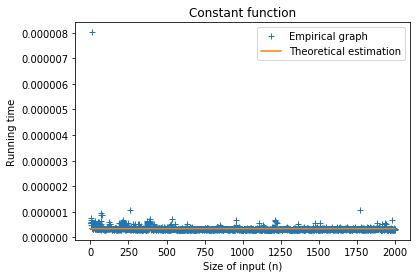

In [13]:
plot_compare(constator,"Constant function", const)

100%|██████████| 2000/2000 [00:03<00:00, 629.14it/s]


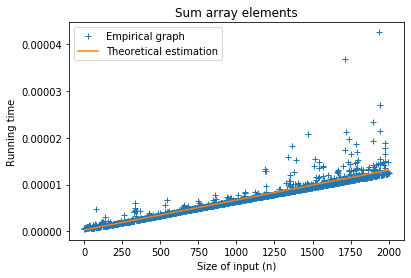

In [14]:
plot_compare(summator, "Sum array elements", linear)

100%|██████████| 2000/2000 [00:11<00:00, 171.90it/s]


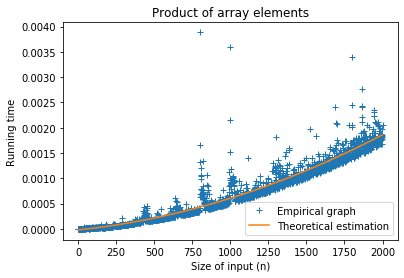

In [47]:
plot_compare(productor, "Product of array elements", squared)

100%|██████████| 2000/2000 [05:54<00:00,  5.64it/s]


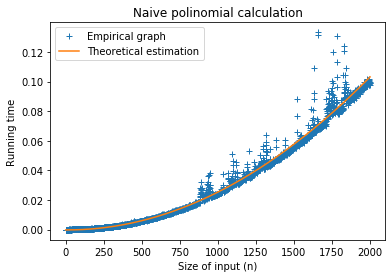

In [112]:
plot_compare(polinomial, "Naive polinomial calculation", squared)

100%|██████████| 2000/2000 [00:04<00:00, 458.23it/s]


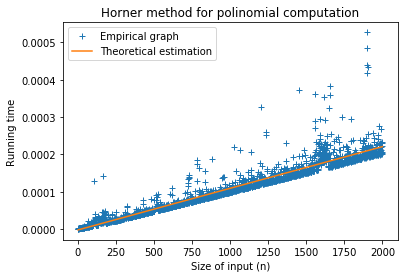

In [61]:
plot_compare(horner,"Horner method for polinomial computation", linear)

100%|██████████| 2000/2000 [15:50<00:00,  2.11it/s]


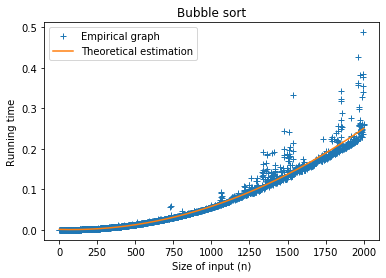

In [28]:
plot_compare(bubble_sort,"Bubble sort", squared)

100%|██████████| 2000/2000 [00:52<00:00, 38.35it/s]


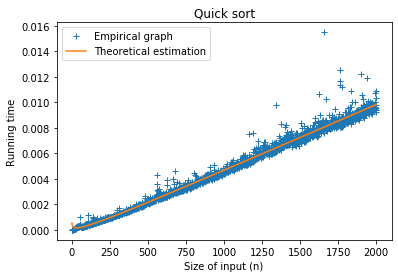

In [114]:
plot_compare(quicksort,"Quick sort", nlogn)

100%|██████████| 2000/2000 [00:04<00:00, 476.88it/s]


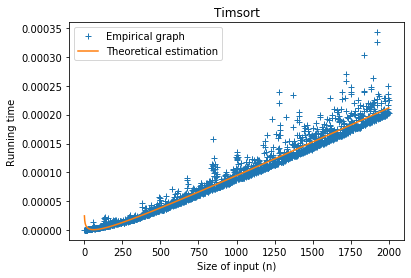

In [113]:
plot_compare(timsort,"Timsort", nlogn)

100%|██████████| 1000/1000 [1:37:36<00:00,  5.86s/it]  


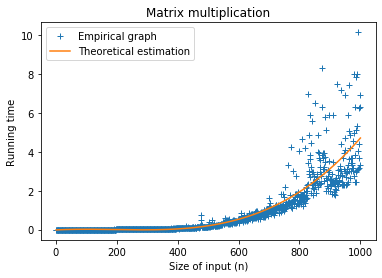

In [40]:
plot_compare(matrix,"Matrix multiplication", cubic)